# Klasifikasi Pneumonia pada Citra X-rays Paru-paru dengan Metode CNN & Transfer Learning


Kelompok 9:
1.   Ida Ayu Nityananda Shandra V Manuaba (2105551129)
2.   Kadek Nia Widiartini (2105551137)


Kelas: B

## Dataset Information

Dataset ini berisi 5.856 gambar X-Ray Dada yang telah divalidasi. Gambar-gambar tersebut dibagi menjadi satu set pelatihan dan satu set pengujian pasien independen. Gambar diberi label sebagai (penyakit: NORMAL/BAKTERI/VIRUS) - (ID pasien acak) - (nomor gambar pasien).

Gambar rontgen dada (anterior-posterior) dipilih dari kohort retrospektif pasien pediatrik berusia satu hingga lima tahun dari Pusat Medis Wanita dan Anak Guangzhou, Guangzhou. Semua pencitraan sinar-X dada dilakukan sebagai bagian dari perawatan klinis rutin pasien.

Untuk analisis gambar rontgen dada, semua radiografi dada pada awalnya disaring untuk kontrol kualitas dengan menghapus semua pemindaian berkualitas rendah atau tidak dapat dibaca. Diagnosis untuk gambar-gambar tersebut kemudian dinilai oleh dua dokter ahli sebelum disetujui untuk melatih sistem AI. Untuk memperhitungkan kesalahan penilaian, set evaluasi juga diperiksa oleh ahli ketiga.


## Importing Packages and Dataset

**Menghubungkan dengan Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Pneumonia

/content/gdrive/.shortcut-targets-by-id/1IaIGjXElY_ldURjPWD48A1x8TiwDN1kv/Pneumonia


In [ ]:
! ls

chest_xray  cnn_model.h5  cnn_modelv2.h5  resnet_modelv2.h5  tuning_modelv2.h5


**Import Libary**

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import os

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_size = 224
batch = 32
seed = 42

**Path Dataset**

In [ ]:
# Path utama dataset
main_path = '/content/gdrive/My Drive/Pneumonia/chest_xray/'

# Path data train dan test
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

# Menggunakan glob untuk menemukan semua file gambar dengan ekstensi .jpeg dalam folder NORMAL dan PNEUMONIA pada path train
train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

# Menggunakan glob untuk menemukan semua file gambar dengan ekstensi .jpeg dalam folder NORMAL dan PNEUMONIA pada path test
test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

**Membuat Dataframe**

In [ ]:
# Membuat list yang berisi path gambar yang ada di folder train
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

# Membuat dataframe untuk data train
df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class']) # Membuat kolom class
df_train['image'] = [x for x in train_list] # Menambahkan kolom image

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

,class,image
0,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-339692-0002.jpeg
1,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-3502771-0001.jpeg
2,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-3502771-0002.jpeg
3,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-3514363-0001.jpeg
4,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-338872-0001.jpeg
...,...,...
5229,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-4233560-0002.jpeg
5230,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-4213815-0003.jpeg
5231,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-4233560-0001.jpeg
5232,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-4213815-0002.jpeg


In [ ]:
df_test

,class,image
0,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/test/NORMAL/NORMAL-1768815-0001.jpeg
1,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/test/NORMAL/NORMAL-186900-0001.jpeg
2,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/test/NORMAL/NORMAL-2123652-0001.jpeg
3,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/test/NORMAL/NORMAL-1759114-0001.jpeg
4,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/test/NORMAL/NORMAL-1160949-0001.jpeg
...,...,...
619,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/test/PNEUMONIA/VIRUS-9890836-0001.jpeg
620,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg
621,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/test/PNEUMONIA/VIRUS-9783315-0001.jpeg
622,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/test/PNEUMONIA/VIRUS-8574414-0001.jpeg


**Visualisasi Distribusi Data Pada Setiap Set**

Data Train

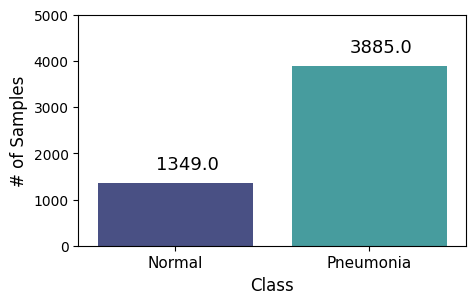

In [ ]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

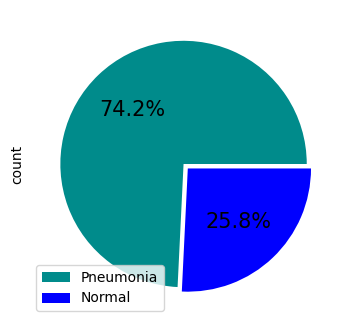

In [ ]:
plt.figure(figsize=(6,4))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Data Test

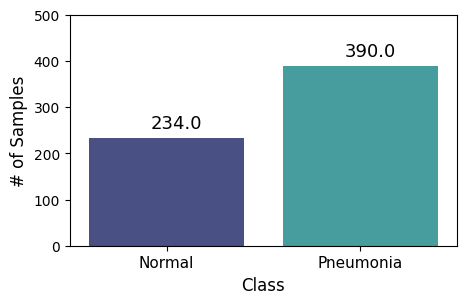

In [ ]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

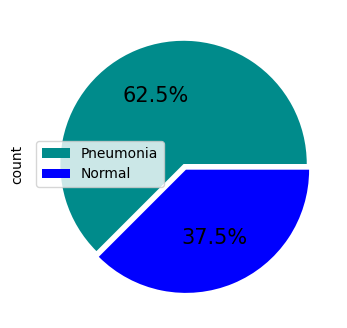

In [ ]:
plt.figure(figsize=(6,4))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

**Contoh Sample Pada Tiap Dataset**

Data Train

Data Train - Normal


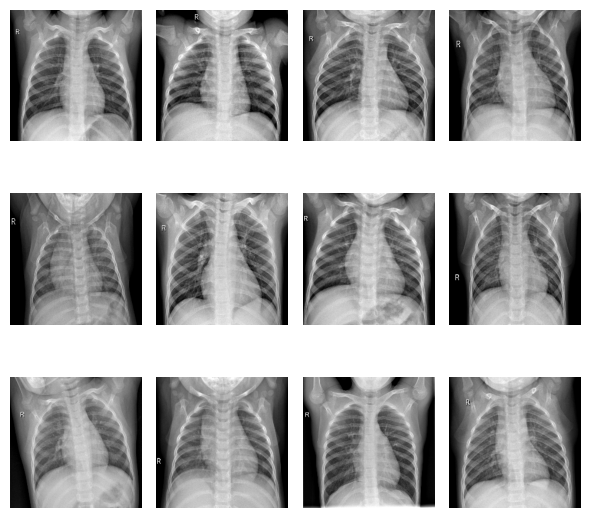

In [ ]:
print('Data Train - Normal')

plt.figure(figsize=(6,6))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (img_size,img_size))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Data Train - Pneumonia


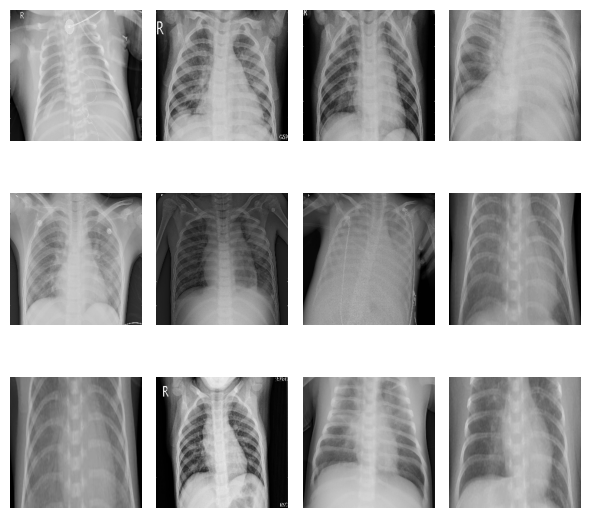

In [ ]:
print('Data Train - Pneumonia')

plt.figure(figsize=(6,6))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (img_size,img_size))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Data Test

Data Test - Normal


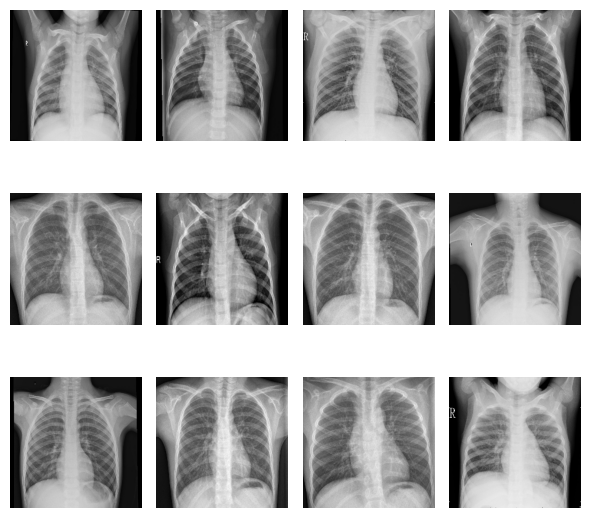

In [ ]:
print('Data Test - Normal')

plt.figure(figsize=(6,6))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (img_size,img_size))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Data Test - Pneumonia


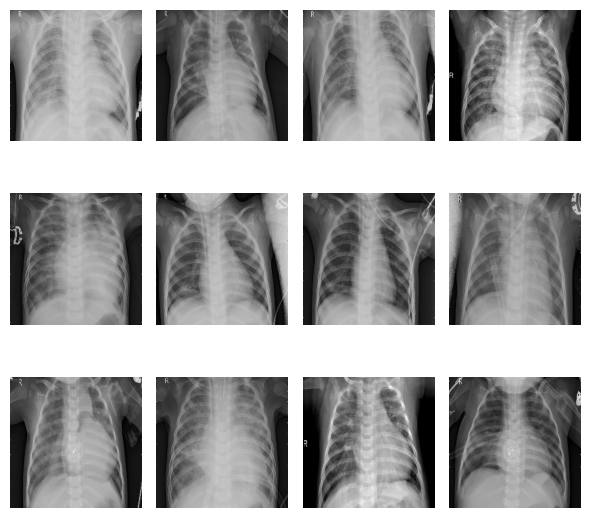

In [ ]:
print('Data Test - Pneumonia')

plt.figure(figsize=(6,6))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (img_size,img_size))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

## Preparing the Data

Membuat data validation, dengan membagi data train dengan persentase 80% untuk data training dan 20% data validation

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = seed, stratify = df_train['class'])

# Stratify digunakan untuk menjaga proporsi kelas

In [ ]:
train_df

,class,image
3568,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-4973842-0004.jpeg
3631,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-5150733-0014.jpeg
2002,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/VIRUS-7628373-0002.jpeg
4286,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-7505456-0002.jpeg
1197,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-2395964-0001.jpeg
...,...,...
2902,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-9551241-0005.jpeg
678,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-791713-0001.jpeg
4266,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-7432256-0003.jpeg
4200,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-7201196-0004.jpeg


In [ ]:
val_df

,class,image
2945,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-9674936-0003.jpeg
4880,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-2965742-0001.jpeg
3177,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/VIRUS-2279309-0001.jpeg
972,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-9848290-0001.jpeg
3059,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/VIRUS-1335423-0004.jpeg
...,...,...
253,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-5075834-0001.jpeg
4315,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-7620642-0004.jpeg
687,Normal,/content/gdrive/My Drive/Pneumonia/chest_xray/train/NORMAL/NORMAL-7943300-0001.jpeg
3417,Pneumonia,/content/gdrive/My Drive/Pneumonia/chest_xray/train/PNEUMONIA/BACTERIA-442579-0001.jpeg


**Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    featurewise_center=True,
    featurewise_std_normalization=True
)

val_datagen = ImageDataGenerator(rescale=1/255., featurewise_center=True, featurewise_std_normalization=True)
test_datagen = ImageDataGenerator(rescale=1/255., featurewise_center=True, featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='class',
    target_size=(img_size, img_size),
    class_mode='binary',
    batch_size=batch,
    seed=seed
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image',
    y_col='class',
    target_size=(img_size, img_size),
    class_mode='binary',
    batch_size=batch,
    seed=seed
)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='class',
    target_size=(img_size, img_size),
    class_mode='binary',
    batch_size=1,
    shuffle=False
)

Found 4187 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


## Build Model

### Custom CNN

**Setting Callbacks**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size, img_size, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=3e-5),
              metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [ ]:
history = model.fit(train_generator,
          batch_size = batch, epochs = 50,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/batch),
          validation_steps=(len(val_df)/batch));

Epoch 1/50
130/130 [==============================] - 2040s 16s/step - loss: 0.5976 - binary_accuracy: 0.7265 - val_loss: 0.8259 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 126s 963ms/step - loss: 0.4121 - binary_accuracy: 0.7979 - val_loss: 1.3914 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.3466 - binary_accuracy: 0.8321
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 118s 902ms/step - loss: 0.3466 - binary_accuracy: 0.8321 - val_loss: 1.8420 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 117s 896ms/step - loss: 0.3103 - binary_accuracy: 0.8588 - val_loss: 1.5596 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 125s 951ms/step - loss: 0.2972 - binary_accuracy: 0.8698 - val_loss: 0

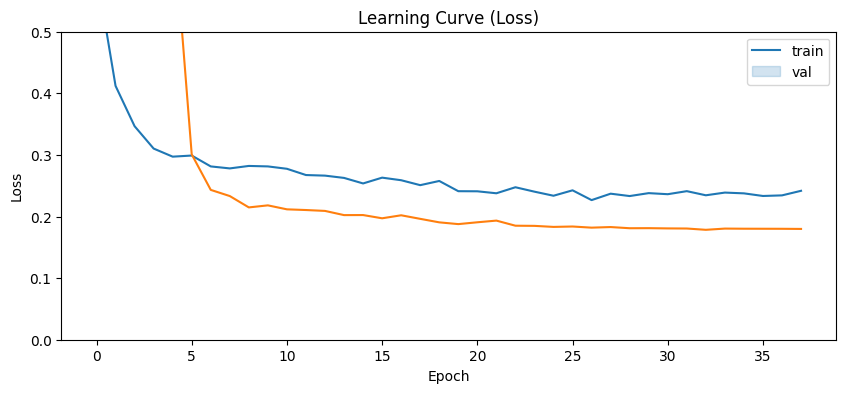

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

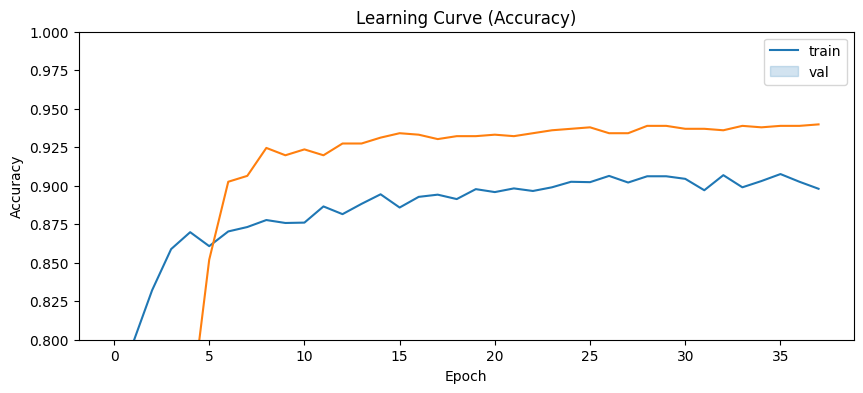

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
model.save("cnn_modelv2.h5")

**Evaluasi Model**

In [ ]:
score = model.evaluate(test_generator, steps = len(test_generator), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4219512939453125
Test accuracy: 0.8589743375778198


### Transfer Learning

In [ ]:
  base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size, img_size, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                         metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(train_generator,
          batch_size = batch, epochs = 50,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/batch),
          validation_steps=(len(val_df)/batch));

Epoch 1/50
130/130 [==============================] - 652s 4s/step - loss: 0.4535 - binary_accuracy: 0.7860 - val_loss: 0.2517 - val_binary_accuracy: 0.9293 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 129s 983ms/step - loss: 0.2601 - binary_accuracy: 0.8978 - val_loss: 0.1860 - val_binary_accuracy: 0.9475 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 132s 1s/step - loss: 0.2257 - binary_accuracy: 0.9128 - val_loss: 0.1623 - val_binary_accuracy: 0.9561 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 131s 1s/step - loss: 0.1921 - binary_accuracy: 0.9276 - val_loss: 0.1446 - val_binary_accuracy: 0.9580 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 129s 982ms/step - loss: 0.1771 - binary_accuracy: 0.9288 - val_loss: 0.1294 - val_binary_accuracy: 0.9637 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 131s 998ms/step - loss: 0.1702 - binary_accuracy: 0.9341 - val_loss: 0

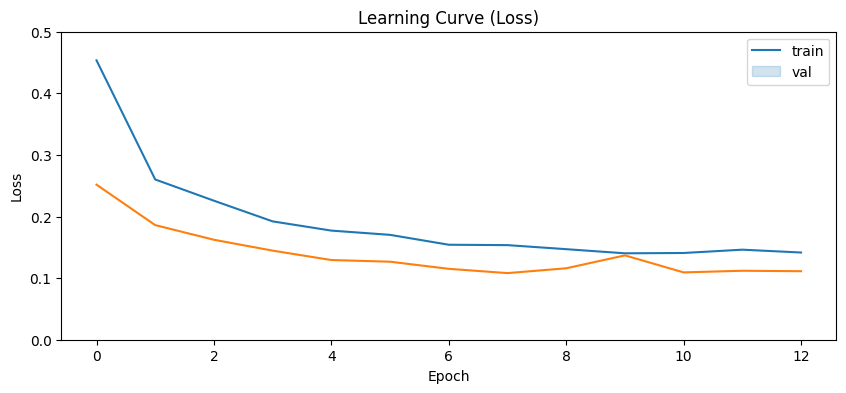

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

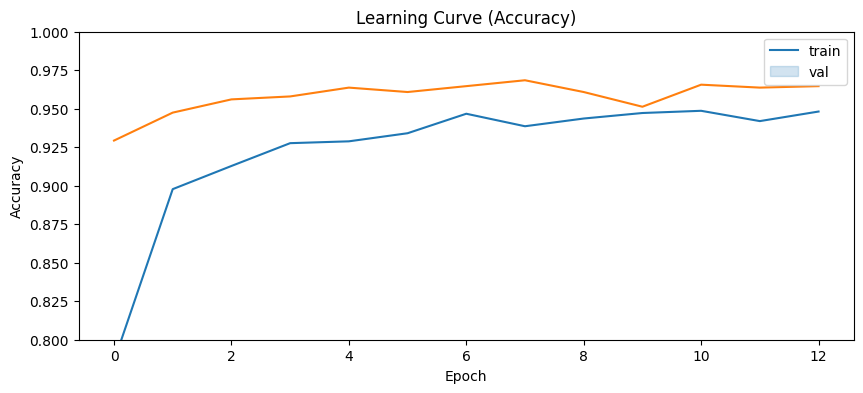

In [ ]:

fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
model.save("resnet_modelv2.h5")

**Evaluasi Model**

In [ ]:
score = model_pretrained.evaluate(test_generator, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31739795207977295
Test accuracy: 0.8733974099159241


### Fine Tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=2e-6),
                         metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(train_generator,
          batch_size = batch, epochs = 50,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/batch),
          validation_steps=(len(val_df)/batch));

Epoch 1/50
130/130 [==============================] - 146s 1s/step - loss: 0.2271 - binary_accuracy: 0.9248 - val_loss: 0.1693 - val_binary_accuracy: 0.9561 - lr: 2.0000e-06
Epoch 2/50
130/130 [==============================] - 135s 1s/step - loss: 0.2016 - binary_accuracy: 0.9362 - val_loss: 0.1662 - val_binary_accuracy: 0.9599 - lr: 2.0000e-06
Epoch 3/50
130/130 [==============================] - 131s 997ms/step - loss: 0.1912 - binary_accuracy: 0.9384 - val_loss: 0.1594 - val_binary_accuracy: 0.9618 - lr: 2.0000e-06
Epoch 4/50
130/130 [==============================] - 129s 986ms/step - loss: 0.1833 - binary_accuracy: 0.9384 - val_loss: 0.1526 - val_binary_accuracy: 0.9599 - lr: 2.0000e-06
Epoch 5/50
130/130 [==============================] - 133s 1s/step - loss: 0.1711 - binary_accuracy: 0.9415 - val_loss: 0.1450 - val_binary_accuracy: 0.9608 - lr: 2.0000e-06
Epoch 6/50
130/130 [==============================] - 128s 979ms/step - loss: 0.1790 - binary_accuracy: 0.9329 - val_loss: 0

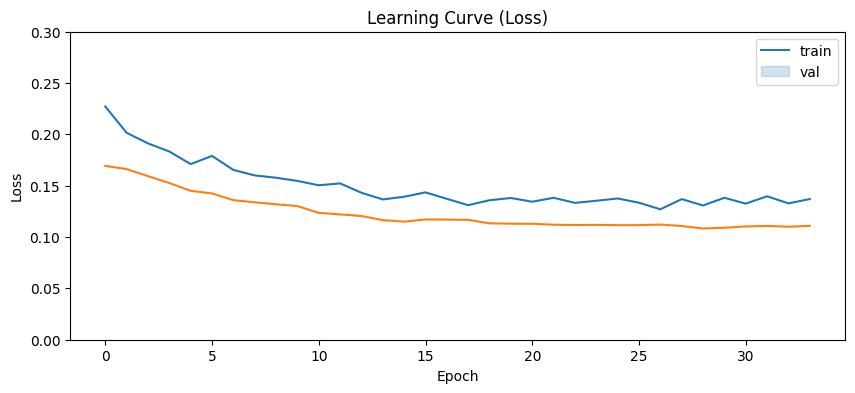

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

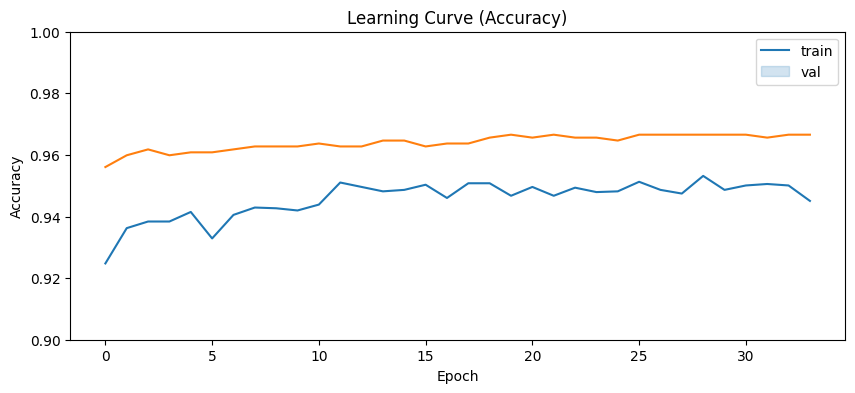

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

**Evaluasi Model**

In [ ]:
score = model_pretrained.evaluate(test_generator, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2264479100704193
Test accuracy: 0.9134615659713745


## Performance Metrics

In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
test_generator.reset()
predictions = model_pretrained.predict(test_generator, steps=len(test_generator), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.9134615384615384


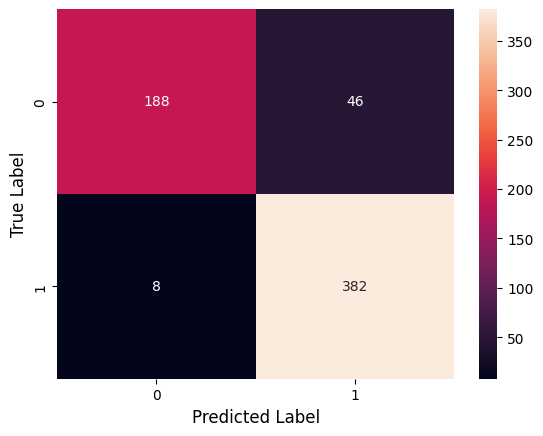

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       234
           1       0.89      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.93      0.89      0.90       624
weighted avg       0.92      0.91      0.91       624

